## Early Stopping through Keras and tensorflow

(https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Exploring Data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

## Build a neural network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [9]:
model = create_model()

In [10]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0748 - accuracy: 0.3690 - val_loss: 1.0241 - val_accuracy: 0.5714 - 2s/epoch - 706ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9816 - accuracy: 0.6786 - val_loss: 0.9353 - val_accuracy: 0.5714 - 55ms/epoch - 18ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9070 - accuracy: 0.7143 - val_loss: 0.8199 - val_accuracy: 0.6429 - 45ms/epoch - 15ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7767 - accuracy: 0.7619 - val_loss: 0.7176 - val_accuracy: 0.8214 - 37ms/epoch - 12ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6658 - accuracy: 0.7857 - val_loss: 0.6214 - val_accuracy: 0.7143 - 38ms/epoch - 13ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5672 - accuracy: 0.6905 - val_loss: 0.5554 - val_accuracy: 0.7143 - 54ms/epoch - 18ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4963 - accuracy: 0.7262 - val_loss: 0.5512 - val_accuracy: 0.5714 - 36ms/epoch - 12ms/step
Epoch 8/200
3/3 - 0s - loss: 0.4529 - accuracy: 0.7143 - val_loss: 0.5041 - val_accuracy: 0.5714 - 36ms/epoch - 12ms/step
Epoch 9/200
3/3 - 0s - lo

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

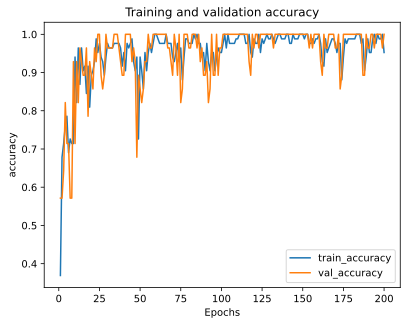

In [13]:
plot_metric(history, 'accuracy')

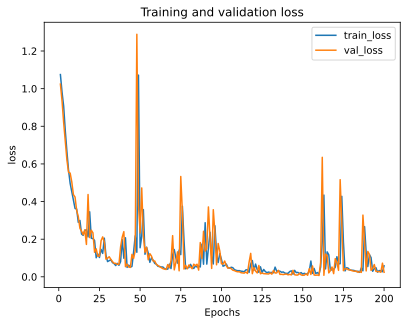

In [14]:
plot_metric(history, 'loss')

### EarlyStopping() with default settings

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

In [16]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0265 - accuracy: 0.9881 - val_loss: 0.0374 - val_accuracy: 0.9643 - 82ms/epoch - 27ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0610 - accuracy: 0.9762 - val_loss: 0.0484 - val_accuracy: 0.9643 - 38ms/epoch - 13ms/step


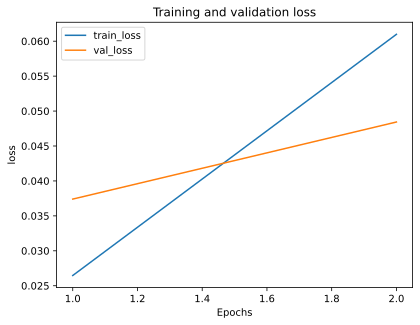

In [17]:
plot_metric(history, 'loss')

### Customizing Early Stopping

In [18]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [19]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0546 - accuracy: 0.9762 - val_loss: 0.0181 - val_accuracy: 1.0000 - 83ms/epoch - 28ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0245 - accuracy: 0.9881 - val_loss: 0.0176 - val_accuracy: 1.0000 - 36ms/epoch - 12ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000 - 54ms/epoch - 18ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000 - 35ms/epoch - 12ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0184 - accuracy: 0.9881 - val_loss: 0.0135 - val_accuracy: 1.0000 - 37ms/epoch - 12ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0180 - accuracy: 0.9881 - val_loss: 0.0138 - val_accuracy: 1.0000 - 54ms/epoch - 18ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000 - 38ms/epoch - 13ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000 - 38ms/epoch - 13ms/step
Epoch 9/200
3/3 - 0s - l

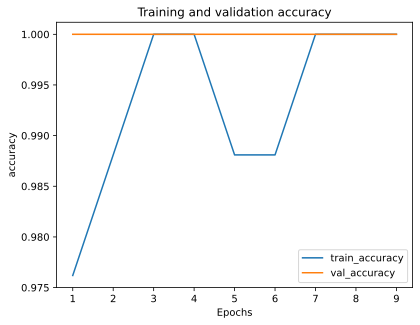

In [20]:
plot_metric(history, 'accuracy')

#### Reference

(https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd)